Using IBM HR Analytics Employee Attrition & Performance Dataset @Kaggle
Building a model using binary classification: 1- they are leaving or 0- they are staying

In [ ]:
# Pycaret to choose what model to use
pip install pycaret

In [2]:
pip install markupsafe==2.0.1 #fixes an ipy error

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for markupsafe: filename=MarkupSafe-2.0.1-cp311-cp311-win_amd64.whl size=17099 sha256=98c85e17b3065178ff8ebc1e7ff5fa0e885e913394a630f29ae29c4cb310d5ef
  Stored in directory: c:\users\veyhn\appdata\local\pip\cache\wheels\ea\18\79\6266ea508b8164a77b95aa19534c77eb805f2878612c37efca
Successfully built markupsafe
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\veyhn\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
import pandas as pd

In [4]:
dataset= pd.read_csv("attrition_data.csv")

In [5]:
dataset.head() #view dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# split into test and train data
# create training set
data = dataset.sample(frac=0.95, random_state=786) #assign 95% of sample to data variable
# random_state is assigned a number to ensure reproducibility
# create testing/validation set with rest of data
data_unseen = dataset.drop(data.index) #drops indexes of rows that were used in training set, so testing/validation set remains
data.reset_index(inplace=True, drop=True) #reset indexes of current df to form training dataset
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: '+ str(data.shape))
print('Unseen Data For Predicitions: '+ str(data_unseen.shape))

Data for Modeling: (1396, 35)
Unseen Data For Predicitions: (74, 35)


In [7]:
data['Attrition'].value_counts()/len(data) # what we are aiming for. 83% of workers stay

No     0.838109
Yes    0.161891
Name: Attrition, dtype: float64

In [8]:
# import classification module. Set Attrition as 
from pycaret.classification import *
exp_clf101 = setup(data=data, target="Attrition", session_id=123)

,Description,Value
0,Session id,123
1,Target,Attrition
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(1396, 35)"
5,Transformed data shape,"(1396, 54)"
6,Transformed train set shape,"(977, 54)"
7,Transformed test set shape,"(419, 54)"
8,Ordinal features,2
9,Numeric features,26


In [9]:
# now compare different models
best_model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8721,0.0000,0.8721,0.8612,0.8374,0.3246,0.3992,0.0780
ada,Ada Boost Classifier,0.8669,0.7820,0.8669,0.8517,0.8480,0.3900,0.4184,0.1280
lda,Linear Discriminant Analysis,0.8640,0.8131,0.8640,0.8498,0.8519,0.4201,0.4337,0.0850
gbc,Gradient Boosting Classifier,0.8567,0.8065,0.8567,0.8376,0.8297,0.3027,0.3467,0.1940
et,Extra Trees Classifier,0.8547,0.7927,0.8547,0.8317,0.8164,0.2353,0.2980,0.1680
lightgbm,Light Gradient Boosting Machine,0.8516,0.7837,0.8516,0.8203,0.8203,0.2621,0.2973,0.2000
rf,Random Forest Classifier,0.8495,0.7816,0.8495,0.8242,0.7997,0.1572,0.2353,0.1870
lr,Logistic Regression,0.8404,0.7262,0.8404,0.7983,0.7919,0.1280,0.1767,1.4390
dummy,Dummy Classifier,0.8383,0.5000,0.8383,0.7027,0.7646,0.0000,0.0000,0.0810
knn,K Neighbors Classifier,0.8280,0.6103,0.8280,0.7832,0.7852,0.1072,0.1451,0.1110


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8878,0.8750,0.8878,0.8809,0.8830,0.5556,0.5598
1,0.8061,0.7752,0.8061,0.7689,0.7829,0.1388,0.1463
2,0.7755,0.7454,0.7755,0.7638,0.7694,0.1348,0.1353
3,0.8673,0.8148,0.8673,0.8522,0.8448,0.3724,0.4135
4,0.8878,0.8148,0.8878,0.8785,0.8790,0.5301,0.5426
5,0.8673,0.7165,0.8673,0.8516,0.8515,0.4107,0.4331
6,0.8469,0.8483,0.8469,0.8240,0.8286,0.3201,0.3375
7,0.9175,0.9122,0.9175,0.9129,0.9122,0.6460,0.6563
8,0.9381,0.9057,0.9381,0.9368,0.9341,0.7345,0.7463


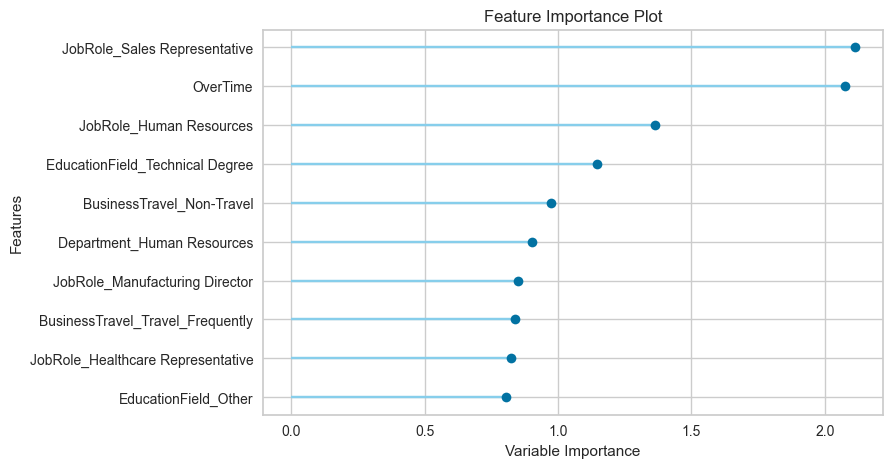

In [10]:
# Using Linear Discriminant Analysis model
model = create_model('lda')
plot_model(model,plot='feature') #plot='feature', this plots the features of the lda model.
# so you're focusing on the importance of what each input variable is contributing to the output/target
# so it shows you what columns are the most important in your prediction

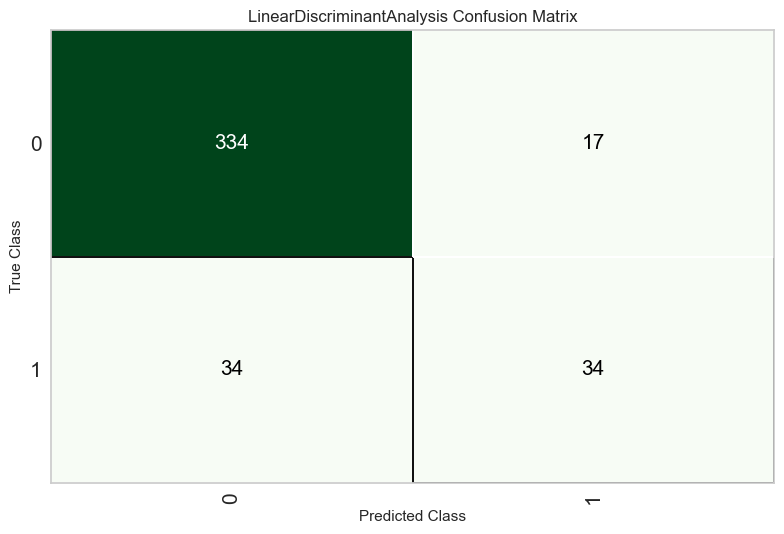

In [11]:
plot_model(model,plot='confusion_matrix')

In [20]:
pip install --upgrade pycaret

  Obtaining dependency information for markupsafe>=2.0.1 from https://files.pythonhosted.org/packages/de/be/5ff3f2568674abbcc1fd373636a68bad58c07da1c14f08c4a6a609db905e/MarkupSafe-2.1.4-cp311-cp311-win_amd64.whl.metadata
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\veyhn\\anaconda3\\Lib\\site-packages\\~-rkupsafe\\_speedups.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [15]:
from pycaret.utils.generic import check_metric # check if a metric is available on pycaret

In [13]:
plot_model(model, plot="parameter")

,Parameters
covariance_estimator,None
n_components,None
priors,None
shrinkage,None
solver,svd
store_covariance,False
tol,0.0001


In [22]:
# Now looking at test_data/validation set
unseen_predictions = predict_model(model, data=data_unseen)
check_metric(unseen_predictions['Attrition'], unseen_predictions['prediction_label'], metric='Accuracy')
# Attrition is the ground truth/true label or actual outcomes you are trying to predict
# unseen_predictions['Label']. these are the predicted labels by your model
# output was 87% accuracy

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8784,0.7893,0.8784,0.8669,0.8702,0.4585,0.4662


0.8784

In [18]:
print(unseen_predictions.columns)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'prediction_label',
       'prediction_score'],
      dtype='object')


In [20]:
print(unseen_predictions)

    Age     BusinessTravel  DailyRate              Department  \
0    32  Travel_Frequently       1005  Research & Development   
1    22         Non-Travel       1123  Research & Development   
2    46  Travel_Frequently       1211                   Sales   
3    23      Travel_Rarely        541                   Sales   
4    46      Travel_Rarely        669                   Sales   
..  ...                ...        ...                     ...   
69   26  Travel_Frequently       1096  Research & Development   
70   38      Travel_Rarely       1321                   Sales   
71   47         Non-Travel       1162  Research & Development   
72   32      Travel_Rarely        801                   Sales   
73   25      Travel_Rarely       1382                   Sales   

    DistanceFromHome  Education    EducationField  EmployeeCount  \
0                  2          2     Life Sciences              1   
1                 16          2           Medical              1   
2              